In [62]:
import numpy as np
import pandas  as pd

# Perceptron

In [2]:
# inherit from base class 'object'
class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ------------
    eta : float
        learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassification in every epoch
    
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        -----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples
            and n_features is the number of features.
        y: array-like, shape = [n_samples]
            Target values
        
        Returns
        -----------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, x):
        """Calculate net input"""
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
import matplotlib.pyplot as plt

In [6]:
y = df.iloc[0:100, 4].values

In [7]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [8]:
X = df.iloc[0:100, [0, 2]].values

In [9]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')

In [10]:
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')

In [11]:
plt.xlabel('sepal length [cm]')

Text(0.5,0,u'sepal length [cm]')

In [12]:
plt.ylabel('petal length [cm]')

Text(0,0.5,u'petal length [cm]')

In [13]:
plt.legend(loc='upper left')

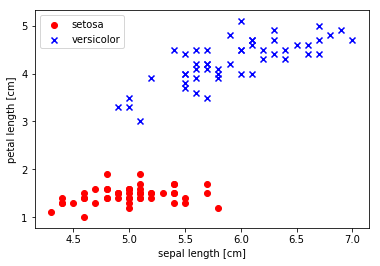

In [14]:
plt.show()

In [15]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [16]:
ppn.fit(X, y)

In [17]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')

In [18]:
plt.xlabel('Epochs')

Text(0.5,0,u'Epochs')

In [19]:
plt.ylabel('Number of misclassifications')

Text(0,0.5,u'Number of misclassifications')

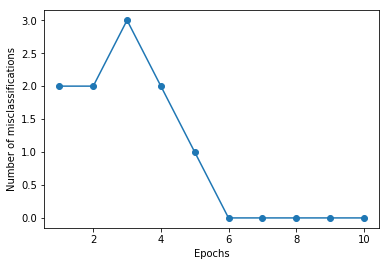

In [20]:
plt.show()

In [21]:
from matplotlib.colors import ListedColormap

In [22]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

In [23]:
plot_decision_regions(X, y, classifier=ppn)

In [24]:
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

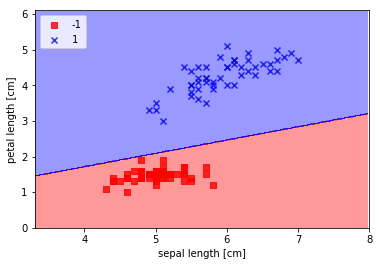

In [25]:
plt.show()

# Adaptive Linear Neuron (Adaline)

In [26]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Value of cost funcion in every epoch.
        
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            training vectors,
            where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        -----------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1]) # don't forget to init the weights
        self.cost_ = []
        
        for _ in range(self.n_iter):
            act_out = self.activation(X)
            errors = y - act_out # inportant step, get the errors!
            delta_w = errors.dot(X)*self.eta
            self.w_[1:] += delta_w
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, x):
        """Calculate net input"""
        return x.dot(self.w_[1:])+self.w_[0]
    
    def activation(self, x):
        """Compute linear activation"""
        return self.net_input(x)
    
    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.activation(x)>0, 1, -1)
    

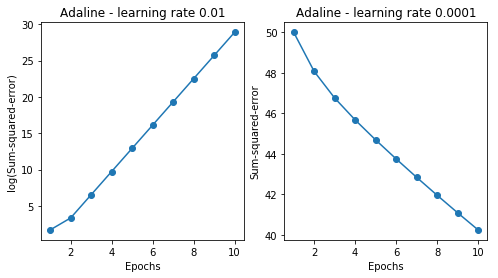

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)  +1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)  +1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - learning rate 0.0001')
plt.show()

In [28]:
X_std = np.copy(X)

In [38]:
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [39]:
ada = AdalineGD(n_iter=15, eta=0.01)

In [40]:
ada.fit(X_std, y)

In [41]:
plot_decision_regions(X_std, y, classifier=ada)

In [43]:
plt.title('Adline - Gradient Decent')

Text(0.5,1,u'Adline - Gradient Decent')

In [44]:
plt.xlabel('sepal length [standardized]')

Text(0.5,0,u'sepal length [standardized]')

In [45]:
plt.ylabel('petal length [standardized]')

Text(0,0.5,u'petal length [standardized]')

In [46]:
plt.legend(loc='upper left')

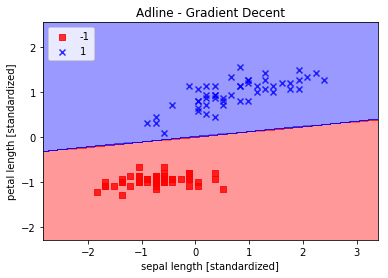

In [47]:
plt.show()

In [57]:
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')

In [58]:
plt.xlabel('Epochs')

Text(0.5,0,u'Epochs')

In [59]:
plt.ylabel('Sum-squared-error')

Text(0,0.5,u'Sum-squared-error')

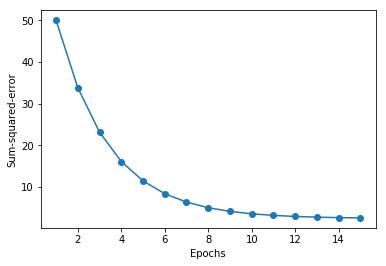

In [60]:
plt.show()

# Adaline Stochastic Gradient Descent

In [61]:
from numpy.random import seed

In [ ]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
    shuffle : bool (default: True)
        Shuffles training data every epoch
        if True to prevent cycles
    random_state : int (default: None)
        Set random state for shuffling
        and initializing the weights
        
    """
    def __init__(self, eta=0.01, n_iter=10,
                shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
            
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and 
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        -----------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        